In [4]:
import os
import sys; sys.path.append("~/HHbbgg_ETH_devel/Training/python") # to load packages
import training_utils as utils
import numpy as np
reload(utils)
import plotting_utils as plotting
reload(plotting)
import optimization_utils as optimization
reload(optimization)
import postprocessing_utils as postprocessing
reload(postprocessing)
import ROOT
from ROOT import TChain, TTree,TCanvas,TH1F,TList,TFile,TH2F,TPaveLabel,TPaveText,TLorentzVector

In [6]:
file_dir = '/mnt/t3nfs01/data01/shome/nchernya/CMSSW_8_0_28/src/flashgg/'
chains = [None,None,None]
chainsGen = []
outname = 'reweighting_19_10_2018_all_nodes/output_GluGluToHHTo2B2G_reweighted_nodes_13TeV-madgraph.root'

In [7]:
out = TFile(file_dir+outname,'recreate')
gen_events_per_node = []
for node in range(2,14):
    filename = file_dir+'reweighting_19_10_2018_node_%d/'%node+'output_GluGluToHHTo2B2G_reweighted_node_%d_13TeV-madgraph.root'%node    
    file = TFile(filename)
    dir = file.GetDirectory('tagsDumper')
    dir = dir.GetDirectory('trees')
    dirGen = file.GetDirectory('genDiphotonDumper')
    dirGen = dirGen.GetDirectory('trees')
    
    tlist = TList()
    tlistGen = TList()
    tlistGenTagged = TList()
    for i in range(2,14):
        name = 'GluGluToHHTo2B2G_node_%d_13TeV_madgraph_13TeV_DoubleHTag_0'%(i)
        tree = dir.Get(name)
        tlist.Add(tree.Clone(name+'%d'%node))
        name_all = 'GluGluToHHTo2B2G_node_%d_13TeV_madgraph_13TeV_NoTag_0'%(i)
        treeGen = dirGen.Get(name)
        treeGen_all = dirGen.Get(name_all)
        tlistGen.Add(treeGen)
        tlistGenTagged.Add(treeGen)
        tlistGen.Add(treeGen_all)
        gen_events_per_node.append(treeGen.GetEntries()+treeGen_all.GetEntries())
    out.cd()
    newtree = (TTree.MergeTrees(tlist)).Clone('GluGluToHHTo2B2G_reweighted_node_%d'%node)
    newtree.SetName('GluGluToHHTo2B2G_reweighted_node_%d'%node)
    newtreeGen = (TTree.MergeTrees(tlistGen)).Clone('GluGluToHHTo2B2G_reweighted_node_%d_Gen'%node)
    newtreeGen.SetName('GluGluToHHTo2B2G_reweighted_node_%d_Gen'%node)
    newtreeGenTagged = (TTree.MergeTrees(tlistGenTagged)).Clone('GluGluToHHTo2B2G_reweighted_node_%d_GenTagged'%node)
    newtreeGenTagged.SetName('GluGluToHHTo2B2G_reweighted_node_%d_GenTagged'%node)
    newtree.Write()
    newtreeGen.Write()
    newtreeGenTagged.Write()
out.Close()

In [7]:
plot_dir = '/mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/Training/plots/reweighted_nodes/2016_from_hists/'
date = '19_10'

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


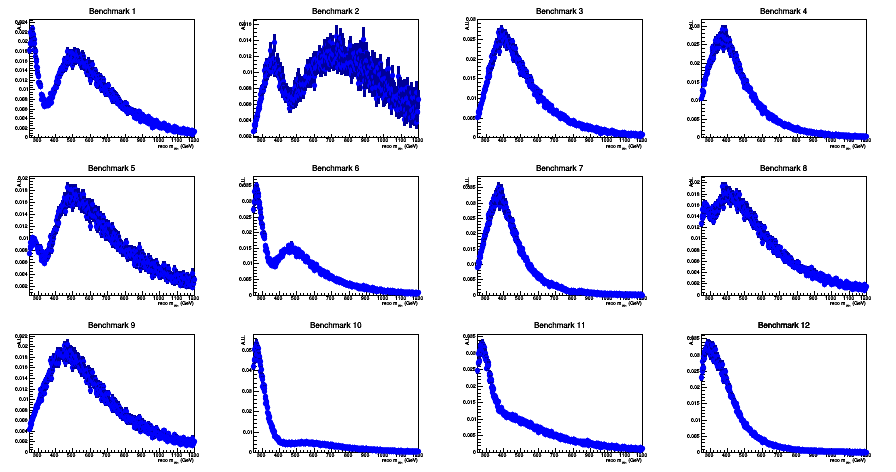

Info in <TCanvas::Print>: pdf file /mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/Training/plots/reweighted_nodes/2016_from_hists/recodiHiggs_mass_19_10.pdf has been created


In [23]:
sum=0.
events=[]
chains_events=[]
c = TCanvas("c","c",900,500)
c.Divide(4,3)
name='GluGluToHHTo2B2G_reweighted_node_'
infile = TFile(file_dir+outname)
hists_list=[]
for i in range(0,12):
    c.cd(i+1)
    tree = infile.Get(name+'%d'%(i+2))
    hist = TH1F("hist_%d"%i,"hist_%d"%i,500,250,1200)
    hist.SetTitle("Benchmark %d"%(i+1))
    hist.GetXaxis().SetTitle('reco m_{HH} (GeV)')
    hist.GetYaxis().SetTitle('A.U.')
    ROOT.gStyle.SetOptTitle(1)
    ROOT.gStyle.SetOptStat(0)
    tree.Draw("diHiggs_mass>>hist_%d"%i,"weight")
    hist.Draw("same")
    hists_list.append(hist)
    chains_events.append(tree.GetEntries())
c.Draw()
c.SaveAs(plot_dir+'recodiHiggs_mass_'+date+'.pdf')

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


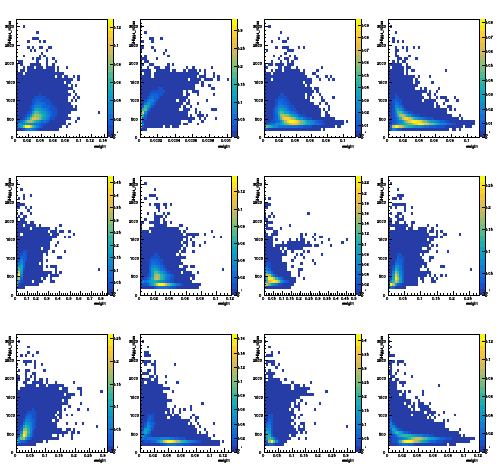

Info in <TCanvas::Print>: pdf file /mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/Training/plots/reweighted_nodes/2016_from_hists/reco_2d_mass_19_10.pdf has been created
Info in <TCanvas::Print>: pdf file /mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/Training/plots/reweighted_nodes/2016_from_hists/reco_2d_costheta_19_10.pdf has been created


In [9]:
sum=0.
events=[]
chains_events=[]
c = TCanvas("c","c",500,500)
c.Divide(4,3)
name='GluGluToHHTo2B2G_reweighted_node_'
infile = TFile(file_dir+outname)
for i in range(0,12):
    c.cd(i+1)
    tree = infile.Get(name+'%d'%(i+2))
    tree.Draw("diHiggs_mass:weight","weight","COLZ")
   # tree.Draw("absCosThetaStar_CS:weight","weight","COLZ")
    ROOT.gStyle.SetOptTitle(0)
    chains_events.append(tree.GetEntries())
c.Draw()
c.SaveAs(plot_dir+'reco_2d_mass_'+date+'.pdf')
c.SaveAs(plot_dir+'reco_2d_costheta_'+date+'.pdf')

In [10]:
sum=0.
chains_events_Gen=[]
name='GluGluToHHTo2B2G_reweighted_node_'
infile = TFile(file_dir+outname)
for i in range(0,12):
    tree = infile.Get(name+'%d_Gen'%(i+2))
    chains_events_Gen.append(tree.GetEntries())
    hist = TH1F("hist_%d"%i,"hist_%d"%i,1,0,2)
    tree.Draw("1>>hist_%d"%i,"weight")
    sum+=hist.Integral(0,hist.GetNbinsX()+1)
    print '%.3f'%hist.Integral(0,hist.GetNbinsX()+1),',',
print sum

11.641 , 11.617 , 11.637 , 11.633 , 11.649 , 11.638 , 11.634 , 11.642 , 11.642 , 11.635 , 11.636 , 11.631 , 139.63465023


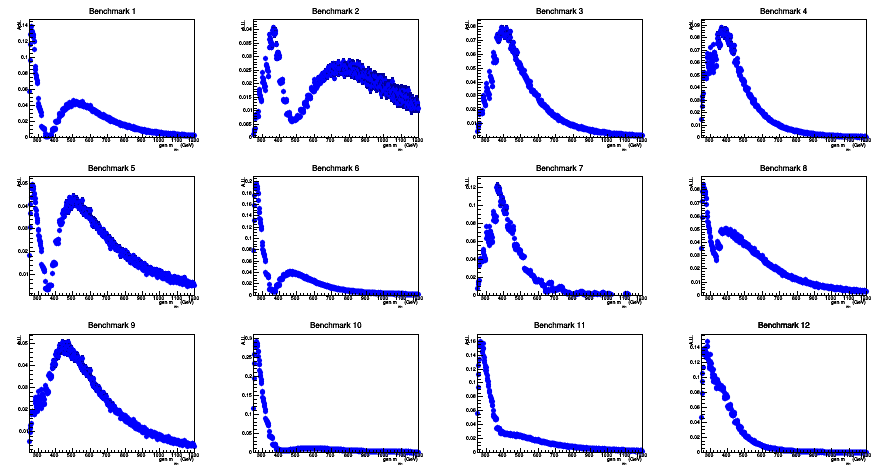

Info in <TCanvas::Print>: pdf file /mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/Training/plots/reweighted_nodes/2016_from_hists/gen_diHiggss_mass_19_10.pdf has been created


In [11]:
## Plot gen mhh

c2 = TCanvas("c2","c2",900,500)
c2.Divide(4,3)
name='GluGluToHHTo2B2G_reweighted_node_'
infile = TFile(file_dir+outname)
hists_list_gen=[]
for i in range(0,12):
    c2.cd(i+1)
    tree = infile.Get(name+'%d_Gen'%(i+2))
    hist = TH1F("hist_%d"%i,"hist_%d"%i,500,250,1200)
    hist.SetTitle("Benchmark %d"%(i+1))
    hist.GetXaxis().SetTitle('gen m_{HH} (GeV)')
    hist.GetYaxis().SetTitle('A.U.')
    ROOT.gStyle.SetOptTitle(1)
    ROOT.gStyle.SetOptStat(0)
    for entry in tree:
        jet1,jet2,pho1,pho2 = TLorentzVector(), TLorentzVector(), TLorentzVector(), TLorentzVector()
        jet1.SetPxPyPzE(tree.leadJet_px,tree.leadJet_py,tree.leadJet_pz,tree.leadJet_e)
        jet2.SetPxPyPzE(tree.subleadJet_px,tree.subleadJet_py,tree.subleadJet_pz,tree.subleadJet_e)
        pho1.SetPxPyPzE(tree.leadPho_px,tree.leadPho_py,tree.leadPho_pz,tree.leadPho_e)
        pho2.SetPxPyPzE(tree.subleadPho_px,tree.subleadPho_py,tree.subleadPho_pz,tree.subleadPho_e)
        gen_mhh = (jet1+jet2+pho1+pho2).M()
        hist.Fill(gen_mhh,tree.weight)
    hist.Draw("same")
    hists_list_gen.append(hist)
c2.Draw()
c2.SaveAs(plot_dir+'gen_diHiggss_mass_'+date+'.pdf')

In [12]:
generated_events = [49600,50000,50000,50000,50000,50000,50000,49600,49800,50000,50000,50000]
for num,item in enumerate(generated_events):
    print float(gen_events_per_node[num])/item,',',


0.932116935484 , 0.93314 , 0.93364 , 0.93296 , 0.93054 , 0.93298 , 0.93424 , 0.933709677419 , 0.933333333333 , 0.93336 , 0.93208 , 0.9336 ,


In [13]:
sum_reco_nodes=[]
name='GluGluToHHTo2B2G_reweighted_node_'
infile = TFile(file_dir+outname)
for i in range(0,12):
    tree = infile.Get(name+'%d'%(i+2))
    chains_events.append(tree.GetEntries())
    hist = TH1F("hist_%d"%i,"hist_%d"%i,1,0,2)
    tree.Draw("1>>hist_%d"%i,"weight")
    sum_reco_nodes.append(hist.Integral())


In [14]:
for key in sum_reco_nodes:
    print '%.2f'%key,',',
print np.array(sum_reco_nodes).sum()

4.57 , 5.24 , 4.48 , 4.21 , 4.93 , 4.16 , 4.15 , 4.51 , 4.81 , 3.72 , 4.12 , 3.83 , 52.7225387096405


## 2016 and 2017 nodes 

In [4]:
path_2017 = '/mnt/t3nfs01/data01/shome/nchernya/CMSSW_9_4_9/src/flashgg/MC_2017_23_10_2018_nodesonly/'
file_2017 = 'output_GluGluToHHTo2B2G_all_nodes_13TeV-madgraph_correctedcfg.root'

file_dir='/shome/nchernya/HHbbgg_ETH_devel/root_files/deepCSV_01_10_2018/'
outname='output_GluGluToHHTo2B2G_reweighted_nodes_13TeV-madgraph.root'

plot_dir = '/mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/Training/plots/reweighted_nodes/2016_2017/'
date = '27_10'

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


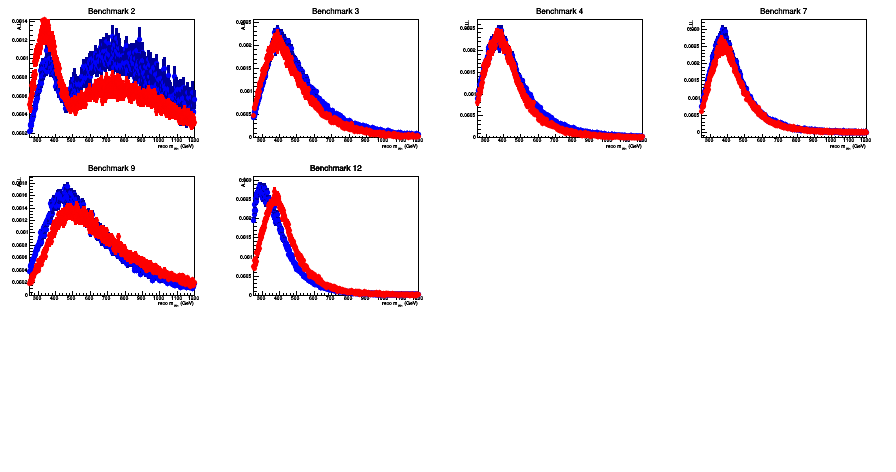

Info in <TCanvas::Print>: pdf file /mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/Training/plots/reweighted_nodes/2016_2017/recodiHiggs_mass_2016_2017_shifted_27_10.pdf has been created


In [7]:
sum=0.
events=[]
chains_events=[]
c = TCanvas("c","c",900,500)
c.Divide(4,3)
name='GluGluToHHTo2B2G_reweighted_node_'
infile = TFile(file_dir+outname)
infile_2017 = TFile(path_2017+file_2017)
hists_list=[]
hists_list_2017=[]
benchmarks_2016 = [3,4,5,8,10,13]
#benchmarks_2016 = [2,3,4,7,9,12]
#for i in range(0,12):
i=0
for num_node in [2,3,4,7,9,12]:
    c.cd(i+1)
    
    name_2017='tagsDumper/trees/GluGluToHHTo2B2G_node_%d_13TeV_madgraph_correctedcfg_13TeV_DoubleHTag_0'%(num_node)
    tree_2017 = infile_2017.Get(name_2017)
    hist_2017 = TH1F("hist_2017_%d"%num_node,"hist_2017_%d"%num_node,500,250,1200)
    hist_2017.SetLineColor(2)
    hist_2017.SetMarkerColor(2)
    tree_2017.Draw("diHiggs_mass>>hist_2017_%d"%num_node,"weight")
    
    tree = infile.Get(name+'%d'%(benchmarks_2016[i]))
    hist = TH1F("hist_2016_%d"%num_node,"hist_2016_%d"%num_node,500,250,1200)
    hist.SetTitle("Benchmark %d"%(num_node))
    hist.GetXaxis().SetTitle('reco m_{HH} (GeV)')
    hist.GetYaxis().SetTitle('A.U.')
    ROOT.gStyle.SetOptTitle(1)
    ROOT.gStyle.SetOptStat(0)
    tree.Draw("diHiggs_mass>>hist_2016_%d"%num_node,"weight/11.75")

    
    hist.Draw("APsame")
    hists_list.append(hist)
    chains_events.append(tree.GetEntries())
    hist_2017.Draw("same")
    hists_list_2017.append(hist_2017)
    
    i+=1
c.Draw()
c.SaveAs(plot_dir+'recodiHiggs_mass_2016_2017_shifted_'+date+'.pdf')